<a href="https://colab.research.google.com/github/indrabna/Post-Test-2-DM/blob/main/2109116084_Muhammad_Indra_Buana_Post_Test_2_DataMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np

# (1) Apriori

Gunakan dataset ini : https://drive.google.com/file/d/1BqC-2d1ZYqFIFwdjdsW5bAAqNFh2AO4C/view?usp=share_link

Dan buatlah daftar support dan confidence untuk 2 item set dengan menggunakan dataset tersebut (hint : buatlah tabel tabulasi terlebih dahulu untuk memudahkan)

In [45]:
df = pd.read_csv("https://raw.githubusercontent.com/indrabna/dataset/main/posttest2-_1_.csv")

In [46]:
# Lihat Data Tabular item pada variavel df
df

,whole milk,pasrty,salty snack,sausage,semi-finished bread,yogurt,soda,pickled vegetables,canned beer,misc. beverages,...,tropical fruit,sugar,butter milk,specialty chocolate,frozen meals,dental care,root vegetables,detergent,dish cleaner,cling film/bags
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
# Menghitung jumlah nilai di setiap coloumns
df.sum()

whole milk             5
pasrty                 1
salty snack            2
sausage                4
semi-finished bread    1
yogurt                 1
soda                   3
pickled vegetables     1
canned beer            1
misc. beverages        1
hygiene articles       1
rolls/buns             4
frankfurter            2
whipped/sour cream     1
curd                   1
beef                   1
white bread            1
butter                 1
frozen vegetables      1
other vegetables       1
tropical fruit         1
sugar                  1
butter milk            1
specialty chocolate    1
frozen meals           1
dental care            1
root vegetables        1
detergent              1
dish cleaner           1
cling film/bags        1
dtype: int64

In [48]:
# Mencari tahu kolom apa saja yang ada pada dataset
df.columns 

Index(['whole milk', 'pasrty', 'salty snack', 'sausage', 'semi-finished bread',
       'yogurt', 'soda', 'pickled vegetables', 'canned beer',
       'misc. beverages', 'hygiene articles', 'rolls/buns', 'frankfurter',
       'whipped/sour cream', 'curd', 'beef', 'white bread', 'butter',
       'frozen vegetables', 'other vegetables', 'tropical fruit', 'sugar',
       'butter milk', 'specialty chocolate', 'frozen meals', 'dental care',
       'root vegetables', 'detergent', 'dish cleaner', 'cling film/bags'],
      dtype='object')

In [49]:
 #Library untuk buat kombinasi barang
from itertools import permutations

 # Menyimpan seluruh kemungkinan kombinasi barang
rules = list(permutations(df.columns, 2))

# Menampilkan seluruh hasil kombinasi
rules

[('whole milk', 'pasrty'),
 ('whole milk', 'salty snack'),
 ('whole milk', 'sausage'),
 ('whole milk', 'semi-finished bread'),
 ('whole milk', 'yogurt'),
 ('whole milk', 'soda'),
 ('whole milk', 'pickled vegetables'),
 ('whole milk', 'canned beer'),
 ('whole milk', 'misc. beverages'),
 ('whole milk', 'hygiene articles'),
 ('whole milk', 'rolls/buns'),
 ('whole milk', 'frankfurter'),
 ('whole milk', 'whipped/sour cream'),
 ('whole milk', 'curd'),
 ('whole milk', 'beef'),
 ('whole milk', 'white bread'),
 ('whole milk', 'butter'),
 ('whole milk', 'frozen vegetables'),
 ('whole milk', 'other vegetables'),
 ('whole milk', 'tropical fruit'),
 ('whole milk', 'sugar'),
 ('whole milk', 'butter milk'),
 ('whole milk', 'specialty chocolate'),
 ('whole milk', 'frozen meals'),
 ('whole milk', 'dental care'),
 ('whole milk', 'root vegetables'),
 ('whole milk', 'detergent'),
 ('whole milk', 'dish cleaner'),
 ('whole milk', 'cling film/bags'),
 ('pasrty', 'whole milk'),
 ('pasrty', 'salty snack'),
 ('

In [50]:
# Menghitung kemunculan kombinasi

# Menyimpan data dalam bentuk list
rule_new = []

# Mengulangi pembacaan dataset
for rule in rules:
  # Menentukan apakah kombinasi tersebut ada atau tidak
  if len(df[(df[rule[0]]==1) & (df[rule[1]]==1)]) >0: 
    # Menyimpan hasil pengecekan dalam bentuk tuple didalam list
    rule_new.append(rule) 

# Menampilkan hasil
rule_new

[('whole milk', 'pasrty'),
 ('whole milk', 'salty snack'),
 ('whole milk', 'sausage'),
 ('whole milk', 'semi-finished bread'),
 ('whole milk', 'yogurt'),
 ('whole milk', 'soda'),
 ('whole milk', 'rolls/buns'),
 ('whole milk', 'butter'),
 ('pasrty', 'whole milk'),
 ('pasrty', 'salty snack'),
 ('salty snack', 'whole milk'),
 ('salty snack', 'pasrty'),
 ('salty snack', 'root vegetables'),
 ('salty snack', 'detergent'),
 ('sausage', 'whole milk'),
 ('sausage', 'semi-finished bread'),
 ('sausage', 'yogurt'),
 ('sausage', 'hygiene articles'),
 ('sausage', 'rolls/buns'),
 ('semi-finished bread', 'whole milk'),
 ('semi-finished bread', 'sausage'),
 ('semi-finished bread', 'yogurt'),
 ('yogurt', 'whole milk'),
 ('yogurt', 'sausage'),
 ('yogurt', 'semi-finished bread'),
 ('soda', 'whole milk'),
 ('soda', 'pickled vegetables'),
 ('soda', 'frankfurter'),
 ('soda', 'whipped/sour cream'),
 ('pickled vegetables', 'soda'),
 ('canned beer', 'misc. beverages'),
 ('misc. beverages', 'canned beer'),
 ('hy

In [51]:
# Menyimpan data dalam bentuk dictionary
hitung = {}
for rule in rule_new:
  banyak_data= len(df[
      (df[rule[0]]==1) & (df[rule[1]]==1) # Menentukan berapa jumlah kemunculan kombinasi dan menyimpannya dalam sebuah variabel
      ])
  
  # Menambahkan hasil penentuan ke dalam dictionary
  hitung[str(rule)] = banyak_data 

# Menampilkan hasil
hitung 

{"('whole milk', 'pasrty')": 1,
 "('whole milk', 'salty snack')": 1,
 "('whole milk', 'sausage')": 2,
 "('whole milk', 'semi-finished bread')": 1,
 "('whole milk', 'yogurt')": 1,
 "('whole milk', 'soda')": 1,
 "('whole milk', 'rolls/buns')": 1,
 "('whole milk', 'butter')": 1,
 "('pasrty', 'whole milk')": 1,
 "('pasrty', 'salty snack')": 1,
 "('salty snack', 'whole milk')": 1,
 "('salty snack', 'pasrty')": 1,
 "('salty snack', 'root vegetables')": 1,
 "('salty snack', 'detergent')": 1,
 "('sausage', 'whole milk')": 2,
 "('sausage', 'semi-finished bread')": 1,
 "('sausage', 'yogurt')": 1,
 "('sausage', 'hygiene articles')": 1,
 "('sausage', 'rolls/buns')": 2,
 "('semi-finished bread', 'whole milk')": 1,
 "('semi-finished bread', 'sausage')": 1,
 "('semi-finished bread', 'yogurt')": 1,
 "('yogurt', 'whole milk')": 1,
 "('yogurt', 'sausage')": 1,
 "('yogurt', 'semi-finished bread')": 1,
 "('soda', 'whole milk')": 1,
 "('soda', 'pickled vegetables')": 1,
 "('soda', 'frankfurter')": 1,
 "('s

In [52]:
# Melihat banyak transaksi
len(df)

19

In [53]:
# List support

# Untuk melakukan perulangan pembacaan dataset pada tiap - tiap kombinasi itemnya
for item,ab in hitung.items(): 

  # Menghitung support pada tiap tiap kombinasi item dan menampilkannya
  print(f"{item} support = {ab/len(df)*100}%") 

('whole milk', 'pasrty') support = 5.263157894736842%
('whole milk', 'salty snack') support = 5.263157894736842%
('whole milk', 'sausage') support = 10.526315789473683%
('whole milk', 'semi-finished bread') support = 5.263157894736842%
('whole milk', 'yogurt') support = 5.263157894736842%
('whole milk', 'soda') support = 5.263157894736842%
('whole milk', 'rolls/buns') support = 5.263157894736842%
('whole milk', 'butter') support = 5.263157894736842%
('pasrty', 'whole milk') support = 5.263157894736842%
('pasrty', 'salty snack') support = 5.263157894736842%
('salty snack', 'whole milk') support = 5.263157894736842%
('salty snack', 'pasrty') support = 5.263157894736842%
('salty snack', 'root vegetables') support = 5.263157894736842%
('salty snack', 'detergent') support = 5.263157894736842%
('sausage', 'whole milk') support = 10.526315789473683%
('sausage', 'semi-finished bread') support = 5.263157894736842%
('sausage', 'yogurt') support = 5.263157894736842%
('sausage', 'hygiene articles'

In [54]:
# List Confidens

for item,ab in hitung.items(): # Untuk melakukan perulangan pembacaan dataset pada tiap - tiap kombinasi itemnya
  #"A->B"

  i = eval(item) # Mengubah string menjadi list

  # Menghitung confidence pada tiap tiap kombinasi item dan menampilkannya
  print(f"{i[0]}->{i[1]}  Confidence = {ab/df[i[0]].sum()*100}%") # Menghitung confidence pada tiap tiap kombinasi item dan menampilkannya

whole milk->pasrty  Confidence = 20.0%
whole milk->salty snack  Confidence = 20.0%
whole milk->sausage  Confidence = 40.0%
whole milk->semi-finished bread  Confidence = 20.0%
whole milk->yogurt  Confidence = 20.0%
whole milk->soda  Confidence = 20.0%
whole milk->rolls/buns  Confidence = 20.0%
whole milk->butter  Confidence = 20.0%
pasrty->whole milk  Confidence = 100.0%
pasrty->salty snack  Confidence = 100.0%
salty snack->whole milk  Confidence = 50.0%
salty snack->pasrty  Confidence = 50.0%
salty snack->root vegetables  Confidence = 50.0%
salty snack->detergent  Confidence = 50.0%
sausage->whole milk  Confidence = 50.0%
sausage->semi-finished bread  Confidence = 25.0%
sausage->yogurt  Confidence = 25.0%
sausage->hygiene articles  Confidence = 25.0%
sausage->rolls/buns  Confidence = 50.0%
semi-finished bread->whole milk  Confidence = 100.0%
semi-finished bread->sausage  Confidence = 100.0%
semi-finished bread->yogurt  Confidence = 100.0%
yogurt->whole milk  Confidence = 100.0%
yogurt-

#(2) KNN

Gunakan dataset ini : https://drive.google.com/file/d/1pXAJZZXCXosf0PTJkyogopKaPFxCYl22/view?usp=share_link

Kemudian buatlah tabel jarak berdasarkan data berikut ini : 

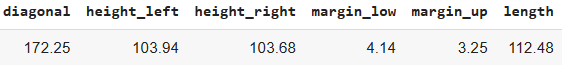
<!-- 1412 -->

### Collect and Describe Data

In [55]:
df2 = pd.read_csv("https://raw.githubusercontent.com/indrabna/dataset/main/deteksi_uang_palsu.csv")

In [56]:
# Lihat Data Tabular item pada variavel df2
df2

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,172.06,104.24,103.66,4.24,3.10,113.02
1,True,171.66,103.68,103.41,4.35,3.33,113.74
2,True,172.23,104.00,103.35,4.43,2.95,113.12
3,True,172.07,104.21,103.82,4.29,3.35,113.30
4,True,171.79,104.57,104.04,4.26,3.15,113.46
5,False,172.00,104.23,104.52,5.76,3.37,110.94
6,False,171.56,104.03,103.93,5.47,3.50,111.67
7,False,171.90,104.33,104.40,4.70,3.31,112.12
8,False,171.84,104.06,104.10,4.87,3.25,111.04
9,False,172.11,104.14,104.15,4.84,3.28,110.98


### 1. Membuat tabel jarak berdasarkan data baru yang ingin ditambahkan

In [57]:
# Membuat tabel jarak berdasarkan data baru yang ingin ditambahkan

from sklearn.metrics.pairwise import euclidean_distances

# membuat dataframe dari data baru
new_data = pd.DataFrame({'diagonal'    : [172.25],
                         'height_left' : [103.94],
                         'height_right': [103.68],
                         'margin_low'  : [4.14],
                         'margin_up'   : [3.25],
                         'length'      : [112.48]})

# Menghitung jarak antara setiap baris dataframe utama dengan dataframe data baru
df2['distance'] = euclidean_distances(df2[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']], new_data)

# Menampilkan tabel jarak
print('Tabel Jarak : ')
print(df2['distance'])


Tabel Jarak : 
0    0.671267
1    1.458321
2    0.834626
3    0.910934
4    1.312593
5    2.421281
6    1.741896
7    1.113463
8    1.722034
9    1.738217
Name: distance, dtype: float64


### 1.1 Menambahkan Kolom Jarak

In [58]:
# setting pandas agar bisa menampilkan seluruh kolom dibaris yang sesuai
pd.set_option('display.max_columns', None)

# Mengatur lebar tabel menjadi 200
pd.set_option('display.width', 200)

df2

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,distance
0,True,172.06,104.24,103.66,4.24,3.10,113.02,0.671267
1,True,171.66,103.68,103.41,4.35,3.33,113.74,1.458321
2,True,172.23,104.00,103.35,4.43,2.95,113.12,0.834626
3,True,172.07,104.21,103.82,4.29,3.35,113.30,0.910934
4,True,171.79,104.57,104.04,4.26,3.15,113.46,1.312593
5,False,172.00,104.23,104.52,5.76,3.37,110.94,2.421281
6,False,171.56,104.03,103.93,5.47,3.50,111.67,1.741896
7,False,171.90,104.33,104.40,4.70,3.31,112.12,1.113463
8,False,171.84,104.06,104.10,4.87,3.25,111.04,1.722034
9,False,172.11,104.14,104.15,4.84,3.28,110.98,1.738217


### 2. Mengurutkan data berdasarkan K jarak terdekat (dengan k = akar 2 dari banyak data)

In [59]:
# Menghitung jarak antara setiap baris dataframe utama dengan dataframe data baru
df2['distance'] = np.sqrt(
    (df2['diagonal'] - 172.25)**2
    + (df2['height_left'] - 103.94)**2
    + (df2['height_right'] - 103.68)**2
    + (df2['margin_low'] - 4.14)**2
    + (df2['margin_up'] - 3.25)**2
    + (df2['length'] - 112.48)**2
)

# Mengurutkan data dari kecil ke besar dan menentukan data terdekat
k = int(np.sqrt(len(df2)))
data_terdekat = df2.sort_values('distance').head(k)

# Menampilkan data terdekat
print(data_terdekat)


   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  length  distance
0        True    172.06       104.24        103.66        4.24       3.10  113.02  0.671267
2        True    172.23       104.00        103.35        4.43       2.95  113.12  0.834626
3        True    172.07       104.21        103.82        4.29       3.35  113.30  0.910934


### 3.  Menentukan hasil prediksi berdasarkan label terbanyak

In [60]:
# Mengimpor library sklearn untuk menggunakan algoritma KNN
from sklearn.neighbors import KNeighborsClassifier

# Split data menjadi data training dan data testing
X_train = df2.drop(columns=['is_genuine','distance'],axis=1)
y_train = df2['is_genuine']

# inisiasi data baru menjadi data tes
test_data = new_data

# membuat variabel knn yang berisikan algoritma KNN dengan nilai K = akar 2 dari banyak data
knn = KNeighborsClassifier(n_neighbors=k)

# melatih knn dengan data training
knn.fit(X_train, y_train)

# memprediksi hasil
prediksi = knn.predict(test_data)

print("Berdasarkan jawaban nomor 2, maka hasil prediksinya adalah : True ")
print("Berdasarkan penggunaan library sklearn untuk memprediksi menggunakan Algoritma KNN, hasilnya adalah : "+ ' '.join(map(str, prediksi)))

Berdasarkan jawaban nomor 2, maka hasil prediksinya adalah : True 
Berdasarkan penggunaan library sklearn untuk memprediksi menggunakan Algoritma KNN, hasilnya adalah : True





# (3) Analisis

> Nama : Muhammad Indra Buana

> Nim : 2109116084


Penjelasan posttest : 

Pilihlah salah satu tema dari daftar tema ini :  
1. Perbankan
2. Kesehatan
3. Ritel
4. Pendidkan

Kemudian lakukan analisis dengan menggunakan struktur CRISP-DM

Dimulai dari Business Understanding Hingga Data Preparation 
<img src="https://th.bing.com/th/id/R.f8efea41ae3cd96d86fbc5b10f81ad77?rik=K4Dr%2biIaVGvW8g&riu=http%3a%2f%2fwww.dataprix.com%2ffiles%2fCRISPDM%2fMetodologia_CRISP_DM1_html_52cdbecf.png&ehk=6ONLJMCVxE421Sjt2JJPE6MfCzrL7LLhDZQPdkJTLcw%3d&risl=&pid=ImgRaw&r=0"/>

Tentukan judul dengan ketentuan setiap orang di kelas beda-beda judulnya dan sumber datasetnya (contoh bisa prediksi atau aturan asosiasi)

Catatan : Tugas ini akan berhubungan dengan posttest terakhir (pertemuan 6)

# Analisis

### Business Understanding


*   Goals Perusahaan :
  Latar belakang dari dataset ini adalah untuk memahami faktor-faktor yang mempengaruhi kinerja akademik siswa pada ujian matematika, membaca, dan menulis. Dataset ini dapat digunakan untuk melakukan analisis tentang faktor-faktor seperti jenis kelamin, etnis, tingkat pendidikan orang tua, jenis makanan siang, dan apakah siswa mengikuti kursus persiapan yang mempengaruhi kinerja akademik siswa.

*   Tujuan Penggunaan DM :

  Goals dari penggunaan data mining pada dataset ini adalah untuk:

  Mengidentifikasi faktor-faktor yang mempengaruhi kinerja akademik siswa pada ujian matematika, membaca, dan menulis.
Membangun model prediksi untuk memperkirakan skor akademik siswa berdasarkan variabel-variabel yang ada.
Menemukan pola dan tren di antara variabel-variabel tersebut yang dapat membantu meningkatkan kinerja akademik siswa.
Membantu guru dan sekolah dalam mengidentifikasi siswa yang membutuhkan perhatian lebih atau memperbaiki program pendidikan untuk meningkatkan kinerja akademik siswa secara keseluruhan.





### Data Understanding

1. Collect Data
2. Penjelasan Setiap Kolom
3. Visualisasi dan Artinya

#### Collect Data

In [61]:
df3 = pd.read_csv('https://raw.githubusercontent.com/indrabna/dataset/main/StudentsPerformance.csv')

#### Describe Data

In [62]:
df3

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


#### Deskripsi Setiap Kolom


In [72]:
df3.info()

# Dataset ini memiliki 1000 baris dan 8 kolom. 
# Berikut adalah penjelasan untuk masing-masing kolom:


# gender: jenis kelamin siswa
# race/ethnicity : etnis atau suku dari siswa
# parental level of education : tingkat pendidikan akhir orang tua siswa
# lunch : apakah siswa makan siang sebelum ujian (normal atau tidak normal)
# test preparation course : apakah siswa menyelesaikan kursus persiapan sebelum ujian (lengkap atau tidak lengkap)

# Dataset ini memiliki 2 jenis tipe data yaitu int, dan object. Terdapat juga 1000 nilai pada setiap kolom, menandakan tidak ada missing value pada dataset ini.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   gender   1000 non-null   object
 1   lunch    1000 non-null   object
 2   pre      1000 non-null   object
 3   math     1000 non-null   int64 
 4   reading  1000 non-null   int64 
 5   writing  1000 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 47.0+ KB


In [64]:
df3.describe()

# describing data 

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [65]:
# mempermudah penamaan coloumns
df3.rename(columns={"race/ethnicity":"ethnicity","parental level of education":"parent_education"
                    ,"math score":"math","reading score":"reading","writing score":"writing",
                    "test preparation course":"pre"},inplace=True)
df3.head()

,gender,ethnicity,parent_education,lunch,pre,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Visualisasi dan Penjelasan

###### Perbandingan nilai siswa laki-lai dan perempuan

###### 1. Hubungan antara Math Score dan Reading Score

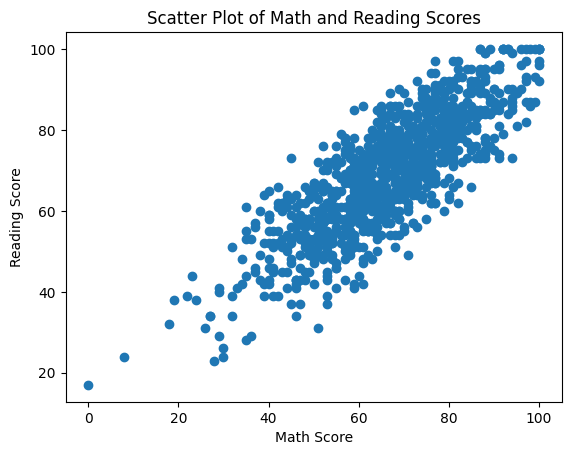

In [66]:
import matplotlib.pyplot as plt

plt.scatter(df3["math"], df3["reading"])
plt.xlabel("Math Score")
plt.ylabel("Reading Score")
plt.title("Scatter Plot of Math and Reading Scores")
plt.show()

# Scatter plot menunjukkan hubungan antara dua variabel numerik pada dataset, 
# di mana setiap titik pada plot menunjukkan pasangan nilai dari dua variabel tersebut.
# Jika titik-titik pada plot tersebar secara acak, maka tidak ada korelasi yang jelas antara keduanya.


###### 2. Perolehan nilai rata-rata setiap grup dalam setiap pelajaran


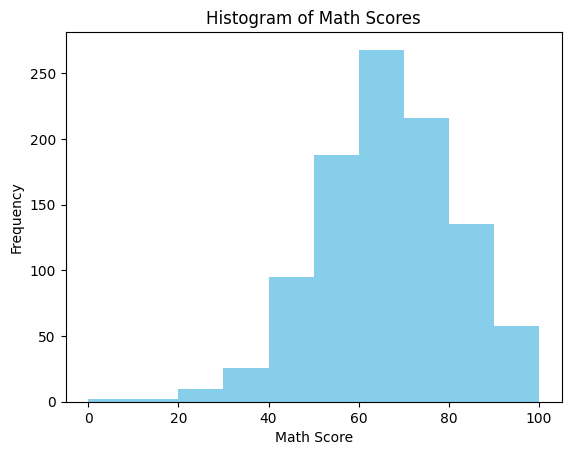

In [67]:
import matplotlib.pyplot as plt

plt.hist(df3["math"], bins=10, color="skyblue")
plt.xlabel("Math Score")
plt.ylabel("Frequency")
plt.title("Histogram of Math Scores")
plt.show()

# Visualisasi di atas adalah histogram untuk distribusi variabel "math" pada dataset. 
# Sumbe x menunjukkan rentang nilai-nilai skor matematika, sedangkan sumbu y menunjukkan frekuensi kemunculan skor tersebut. 
# Dalam contoh ini, histogram dibuat dengan 10 interval dan menggunakan warna skyblue. 
# Dari histogram ini kita dapat melihat distribusi skor matematika pada dataset dan seberapa sering setiap nilai skor muncul.


<ipython-input-68-08bf1a687aee>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3, idx+1)


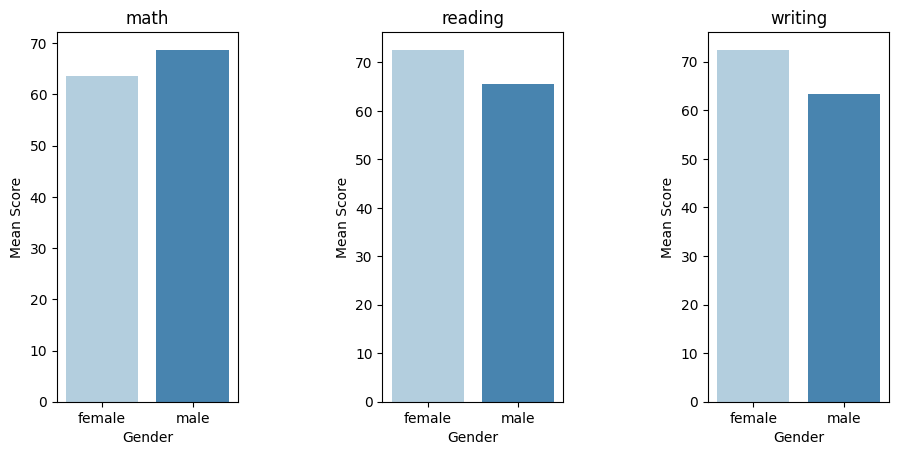

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.subplots_adjust(hspace=0.8, wspace=0.8, left = 0.2, right = 1.5)
for idx in range(3):
    plt.subplot(1,3, idx+1)
    gender_df = df3.groupby("gender")[list(df3.columns[-3:])[idx]].mean()
    sns.barplot(x=gender_df.index, y = gender_df.values, palette = "Blues")
    plt.xlabel("Gender")
    plt.ylabel("Mean Score")
    plt.title(list(df3.columns[-3:])[idx])
plt.show()

# Visualisasi di atas menunjukkan tiga bar plot yang masing-masing menunjukkan rata-rata skor matematika, membaca, 
# dan menulis berdasarkan jenis kelamin (laki-laki atau perempuan) pada dataset. Sumbe x menunjukkan kategori jenis kelamin, 
# sedangkan sumbu y menunjukkan rata-rata skor pada setiap kategori. Setiap bar plot dibuat dengan menggunakan seaborn dan diatur palettenya menjadi "Blues". 
# Dari ketiga bar plot ini, kita dapat membandingkan rata-rata skor matematika, membaca, dan menulis antara laki-laki dan perempuan pada dataset.


###### Data Preparation

In [69]:
df3.isna().sum()

# Melihat data yang kosong pada dataset

gender              0
ethnicity           0
parent_education    0
lunch               0
pre                 0
math                0
reading             0
writing             0
dtype: int64

In [70]:
df3.drop(columns=['parent_education'], axis=1, inplace=True)
# menghapus columns parent_education
df3.drop(columns=['ethnicity'], axis=1, inplace=True)


In [71]:
# Dataframe yang sudah di cleaning 

df3

,gender,lunch,pre,math,reading,writing
0,female,standard,none,72,72,74
1,female,standard,completed,69,90,88
2,female,standard,none,90,95,93
3,male,free/reduced,none,47,57,44
4,male,standard,none,76,78,75
...,...,...,...,...,...,...
995,female,standard,completed,88,99,95
996,male,free/reduced,none,62,55,55
997,female,free/reduced,completed,59,71,65
998,female,standard,completed,68,78,77
